In [30]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [31]:
#Read Data
data = pd.read_csv('ex1data1.txt', header=None)
data.columns = ['Population', 'Profit']

In [32]:
#Data Summary
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


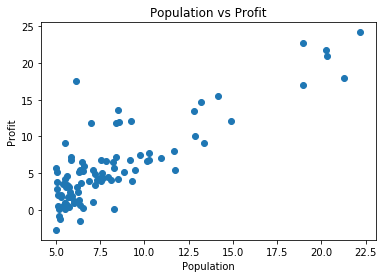

In [33]:
#plotting
plt.scatter(data.Population,data.Profit)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')

In [34]:
#Create X matrix
X = np.array(data.Population)

#Create Y Matrix
y=np.array(data.Profit)

y = y.reshape(-1,1)

# Add 1 column to X Matrix for vector calculation
values = np.full(data.Population.size,1)
X = np.column_stack((values,X))

In [35]:
#Check X Matrix shape
X.shape

(97, 2)

In [36]:
#Initialize theta Matrix as 0 Matrix
theta = np.zeros((2,1))

In [37]:
#Check theta Matrix shape
theta

array([[ 0.],
       [ 0.]])

In [38]:
# h = theta0 * x0 + theta1 * x1
# x1 is the Feature Matrix second column and x0 is the Feature Matrix first column
# x0 is always 1 for calculation
# J = (sum((h-y)^2)) * 1/2m, m = Observation Number = Feature Number
# J = Cost Function
def costfunction(X, theta, y):
    m = X[:,1].size
    h = np.dot(X,theta)
    J = np.sum(np.square(h-y))/(2*m)
    return J

In [39]:
#Grading Decent
def gradingDecent (X, theta, y, alpha, iteration):
    X_0 = X[:,0].reshape(-1,1)
    X_1 = X[:,1].reshape(-1,1)
    m = X[:,1].size
    J_change = []
    for i in range(iteration):
        h = np.dot(X,theta)
        theta[0] = theta[0] - alpha*sum((np.dot(np.transpose(X_0),(h- y))))/m
        theta[1] = theta[1] - alpha*sum((np.dot(np.transpose(X_1),(h- y))))/m
        J_change.append(costfunction(X, theta, y))
    return theta,J_change

In [40]:
# Test Phase 1
#Compute const function with theta =[0,0] values.
J = costfunction(X,theta,y)
print(J)

32.0727338775


In [41]:
# Test Phase 2
#Compute const function with theta =[-1,2] values.
theta = np.array([[-1],
                  [2]])
J = costfunction(X, theta, y)
print(J)

54.242455082


In [42]:
# Test Phase 3
#Grading Decent starts with theta =[0,0], alpha = 0.01 and iteration = 1500  values.
theta = np.zeros((2,1))
alpha = 0.01,
iteration = 1500
theta,J_change = gradingDecent (X, theta, y, alpha, iteration)
print(theta)

[[-3.63029144]
 [ 1.16636235]]


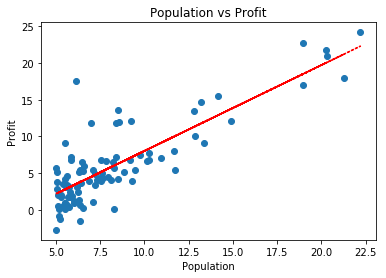

In [43]:
#plotting
plt.scatter(data.Population,data.Profit)
plt.plot(data.Population,np.dot(X,theta),color='red', linestyle='dotted')
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')
plt.show()

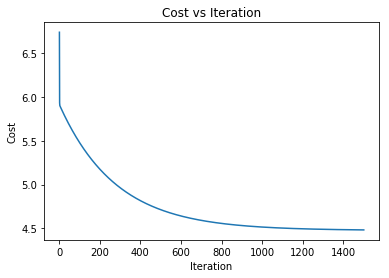

In [44]:
iteration_number = range(1,iteration + 1)
plt.plot(iteration_number,J_change)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')
plt.show()

Cost decrease in every iteration. this means grading decent works well. After 1000 iteration it doesn't going down much more.

In [45]:
#Prediction 1 
#Calculate Population (X Feature) =  35000
X = np.array([[1, 3.5]])
prediction1 = np.dot(X,theta)

#Andrew makes this calculation as below.
print('Profit prediction = {}'.format(prediction1*10000))

Profit prediction = [[ 4519.7678677]]


In [46]:
#Prediction 2 
#Calculate Population (X Feature) =  70000
X = np.array([[1, 7]])
prediction1 = np.dot(X,theta)

#Andrew makes this calculation as below.
print('Profit prediction = {}'.format(prediction1*10000))

Profit prediction = [[ 45342.45012945]]


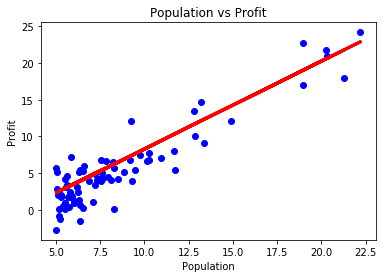

In [47]:
#Regression with using Python Sklearn Libraries

from sklearn import linear_model

# Create linear regression object
regr = linear_model.LinearRegression()

#Reshape and split vaariable for sklearn library
#Train Data
x_train = data.Population[:-20].reshape(-1,1)
y_train = data.Profit[:-20].reshape(-1,1)
#Test Data
x_test = data.Population[20:].reshape(-1,1)
y_test = data.Profit[20:].reshape(-1,1)

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
pred = regr.predict(x_test)

# Plot outputs
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, pred, color='red', linewidth=3)
plt.xlabel('Population')
plt.ylabel('Profit')
plt.title('Population vs Profit')
plt.show()


Plot seems identical but of course there is difference between mathematical way and Python Library

In [48]:
from sklearn.metrics import mean_squared_error, r2_score

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, pred))


Variance score: 0.82


Lets compare predictions that we made with mathematical way

In [49]:
#Prediction1
print('For population = 35,000, prediction = ',10000*regr.predict(3.5)[0][0])
#Prediction2
print('For population = 70,000, prediction = ',10000*regr.predict(7)[0][0])

For population = 35,000, prediction =  5382.25857942
For population = 70,000, prediction =  47160.9097065


Results are slightly different from mathematical way.